In [163]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
#splitting the dataset into test-train
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
#SMOTE technique to deal with class imbalance within the data
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [98]:
df.shape

(3333, 21)

In [99]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [100]:
df.duplicated().sum()

0

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Categorical

- State
- International plan
- Voicemail plan
- Area code-explain

Numerical

Phone Number not useful


In [102]:
df = df.drop('phone number', axis=1)

In [103]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
#categoric_cols = ['state','area code','international plan','voice mail plan']
categoric_cols= ['state', 'area code', 'international plan', 'voice mail plan']

In [104]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

Looking at churn


False    2850
True      483
Name: churn, dtype: int64


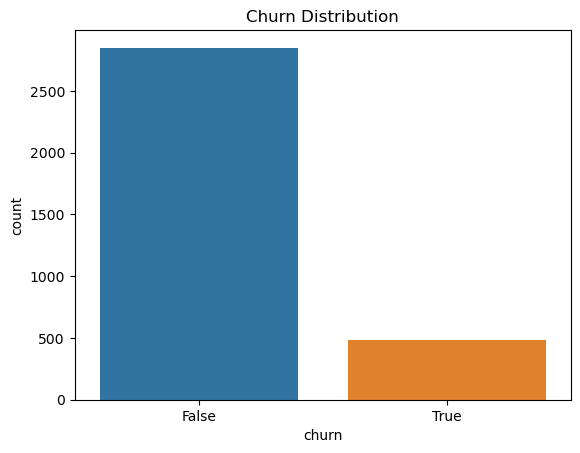

In [105]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

Class imbalance-explain


### Area code analysis


415    1655
510     840
408     838
Name: area code, dtype: int64


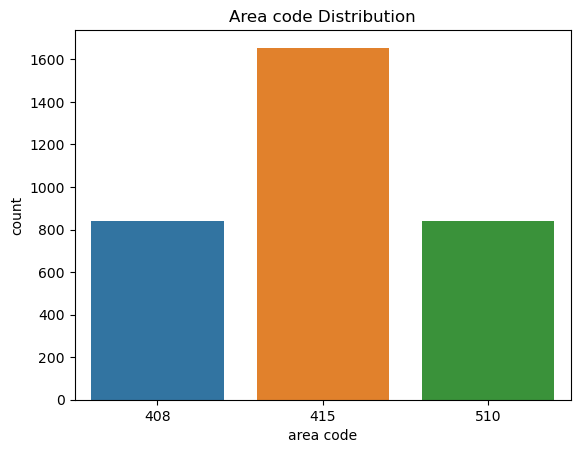

In [106]:
# Countplot of churn feature
print(df['area code'].value_counts())
sns.countplot(data=df, x='area code')
plt.title('Area code Distribution')
plt.show()

Explain the graph


### Churn rate by Area code


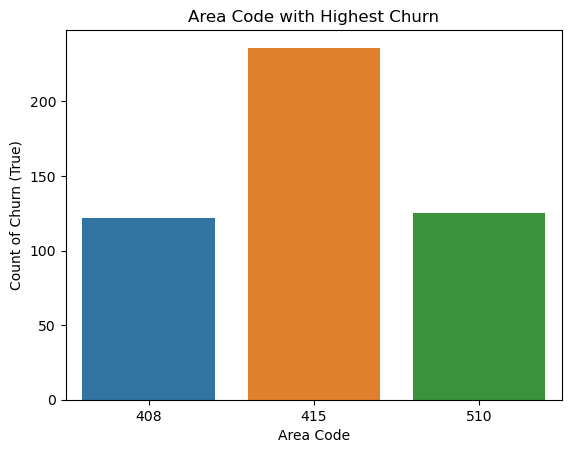

415    236
510    125
408    122
Name: area code, dtype: int64


In [107]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each area code
churn_counts_area_code = df_churn_true['area code'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_area_code.index, y=churn_counts_area_code.values)

# Adding labels and title
plt.xlabel('Area Code')
plt.ylabel('Count of Churn (True)')
plt.title('Area Code with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_area_code)

Explain


### International plan


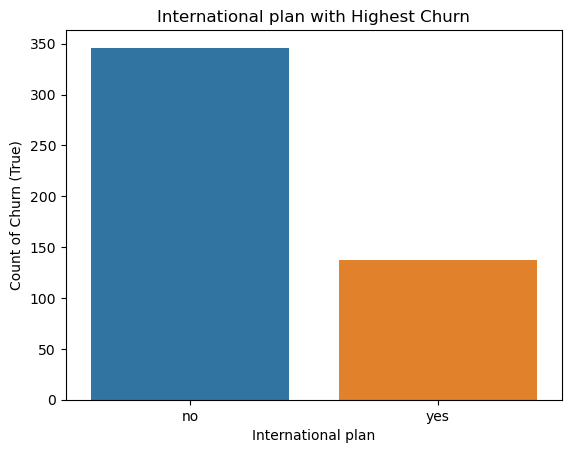

no     346
yes    137
Name: international plan, dtype: int64


In [108]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each international plan
churn_counts_int_plan = df_churn_true['international plan'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_int_plan.index, y=churn_counts_int_plan.values)

# Adding labels and title
plt.xlabel('International plan')
plt.ylabel('Count of Churn (True)')
plt.title('International plan with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_int_plan)

Explain


### Voicemail plan


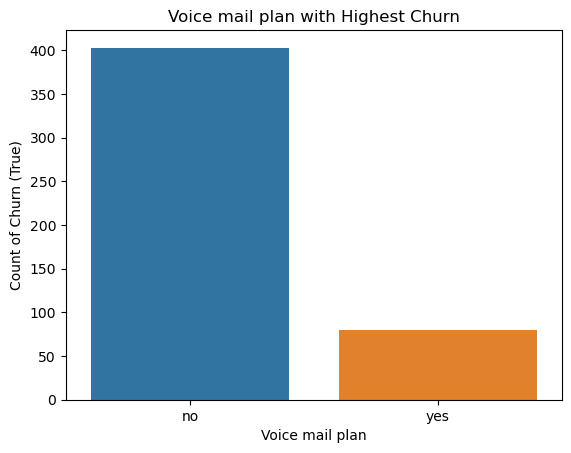

no     403
yes     80
Name: voice mail plan, dtype: int64


In [109]:
# Filtering the DataFrame to include only rows with churn = True
df_churn_true = df[df['churn'] == True]

# Counting the churn values for each international plan
churn_counts_voicemail = df_churn_true['voice mail plan'].value_counts()

# Creating the bar plot
sns.barplot(x=churn_counts_voicemail.index, y=churn_counts_voicemail.values)

# Adding labels and title
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn (True)')
plt.title('Voice mail plan with Highest Churn')


# Displaying the plot
plt.show()

print(churn_counts_voicemail)

Explain below charts


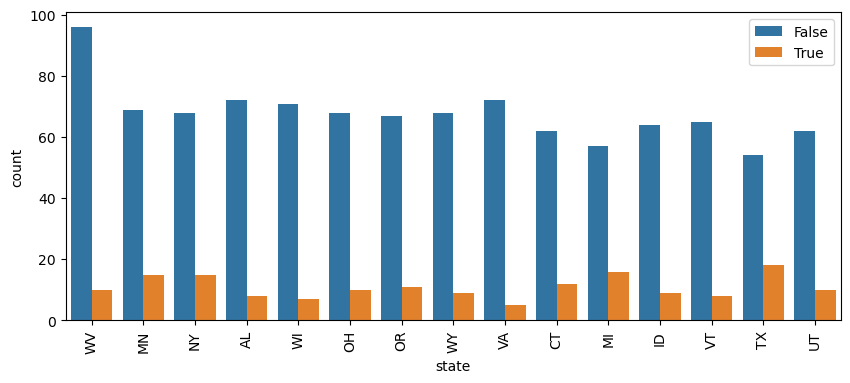

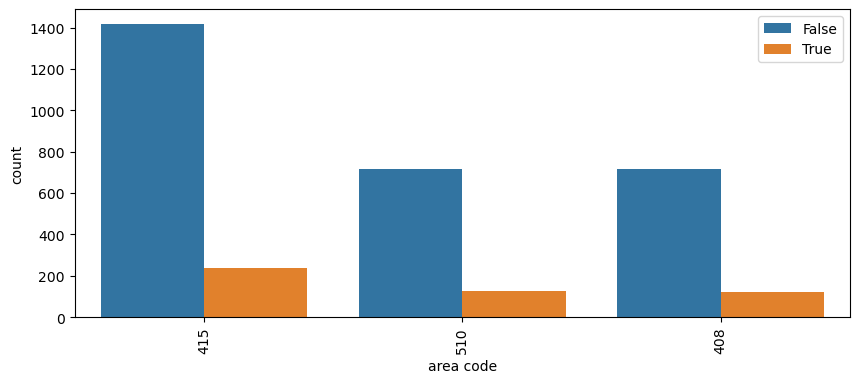

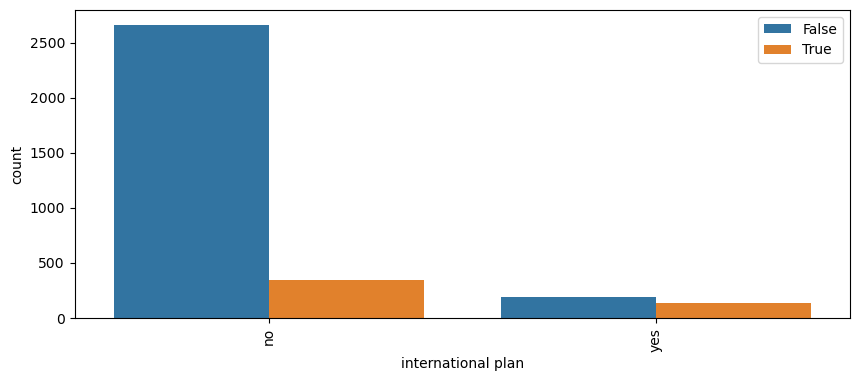

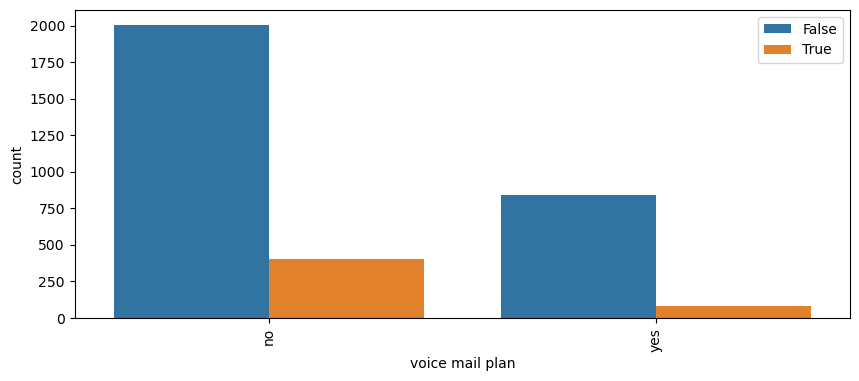

In [110]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

Explain


### Numeric values


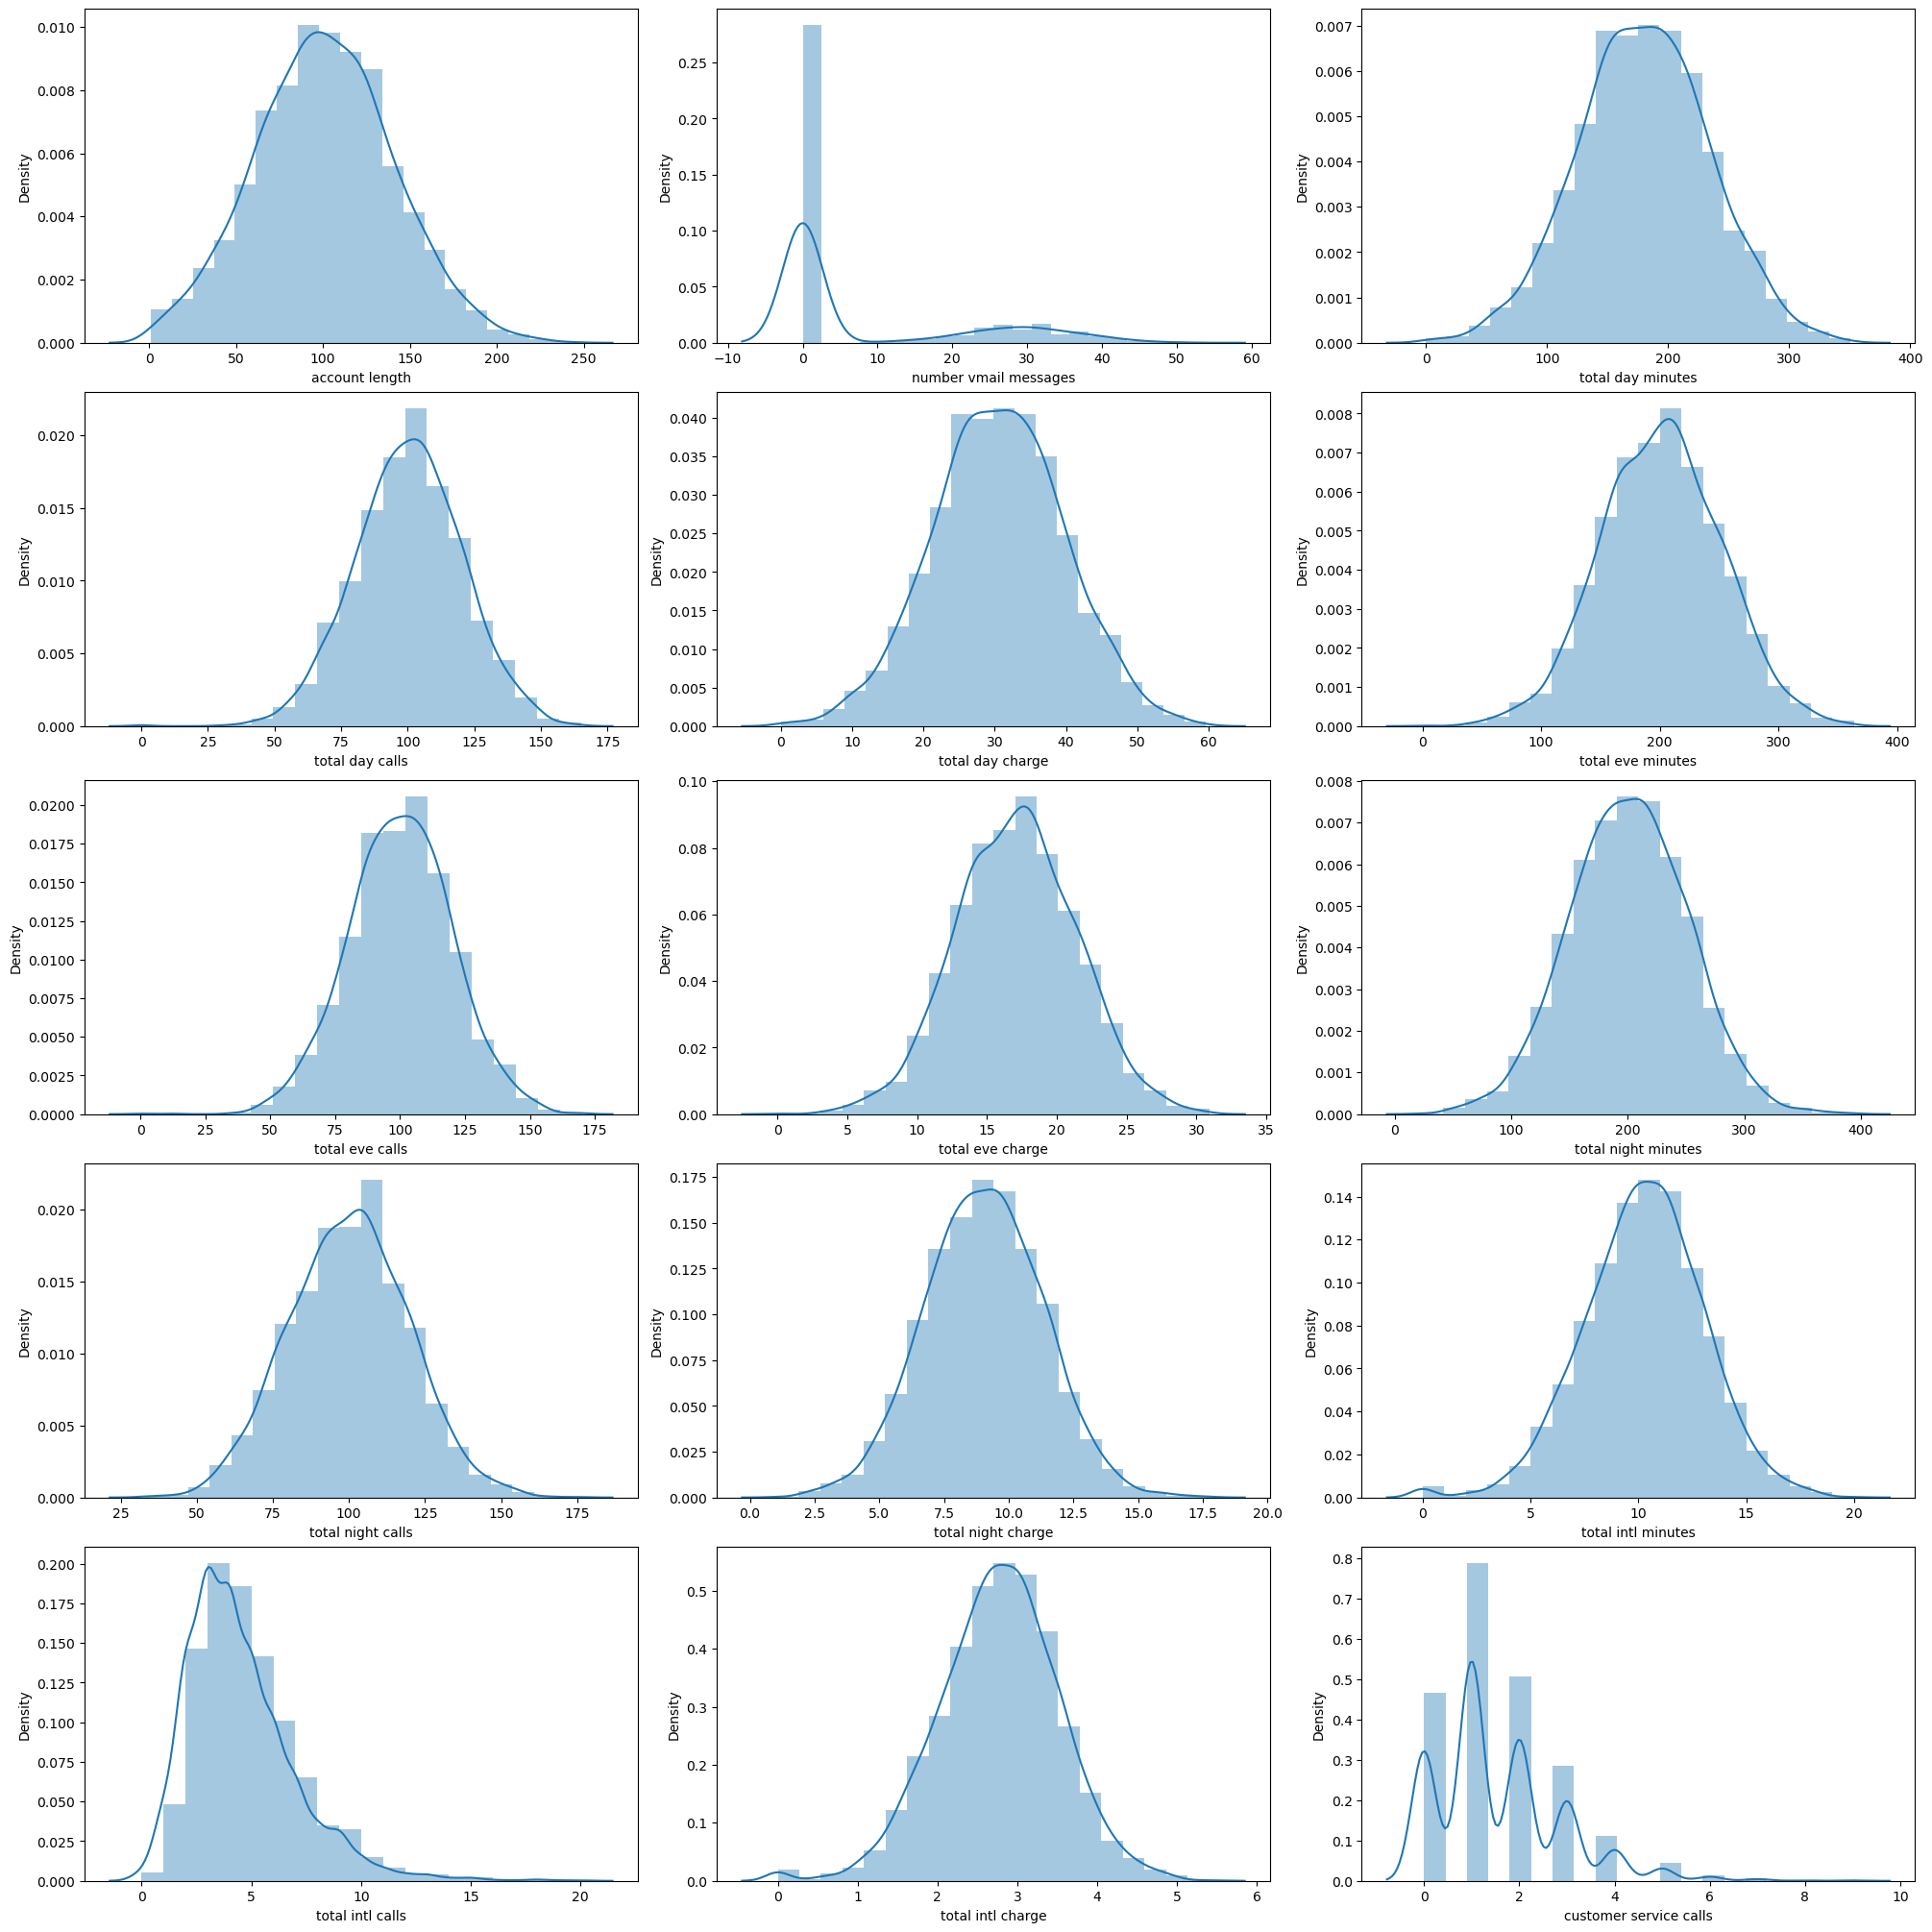

In [111]:
# Create the figure and axes
f, ax = plt.subplots(5, 3, figsize=(20,20 ), constrained_layout=True)

# Iterate through the list of numeric columns and create a distribution plot for each column
for i, column in enumerate(numeric_cols):
    sns.distplot(df[column], bins=20, ax=ax[i // 3][i % 3])

# Show the figure
plt.show()

Explain


### Pairplot


In [112]:
# Create the pairplot
#sns.pairplot(df[numeric_cols], hue="churn")

# Show the figure
#plt.show()

### Correlation


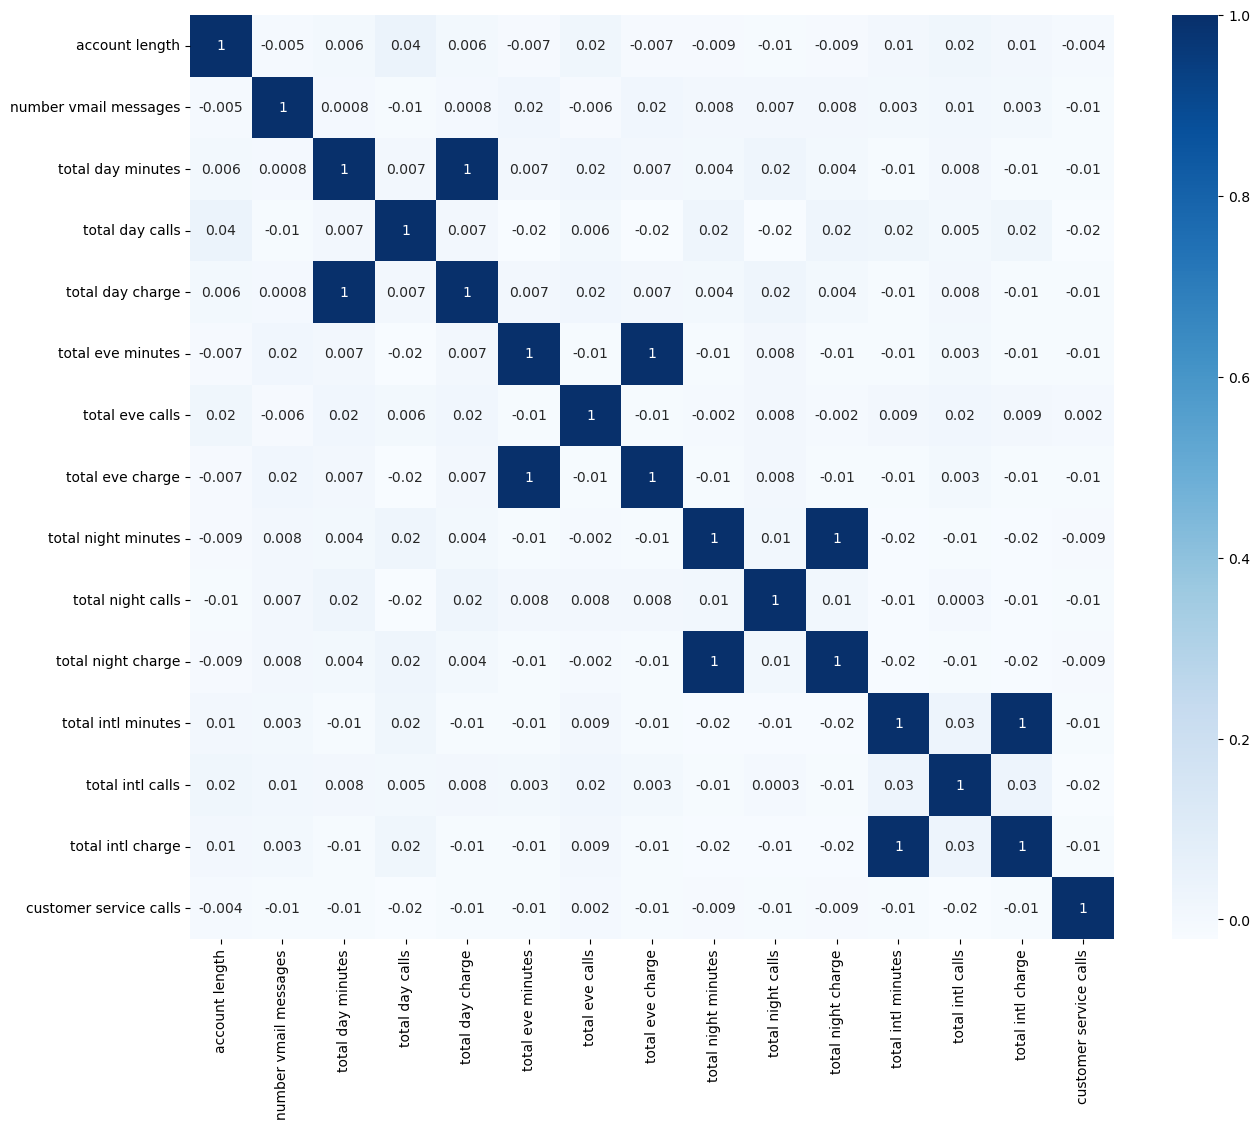

In [113]:
corr_matrix = df[numeric_cols].corr()
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

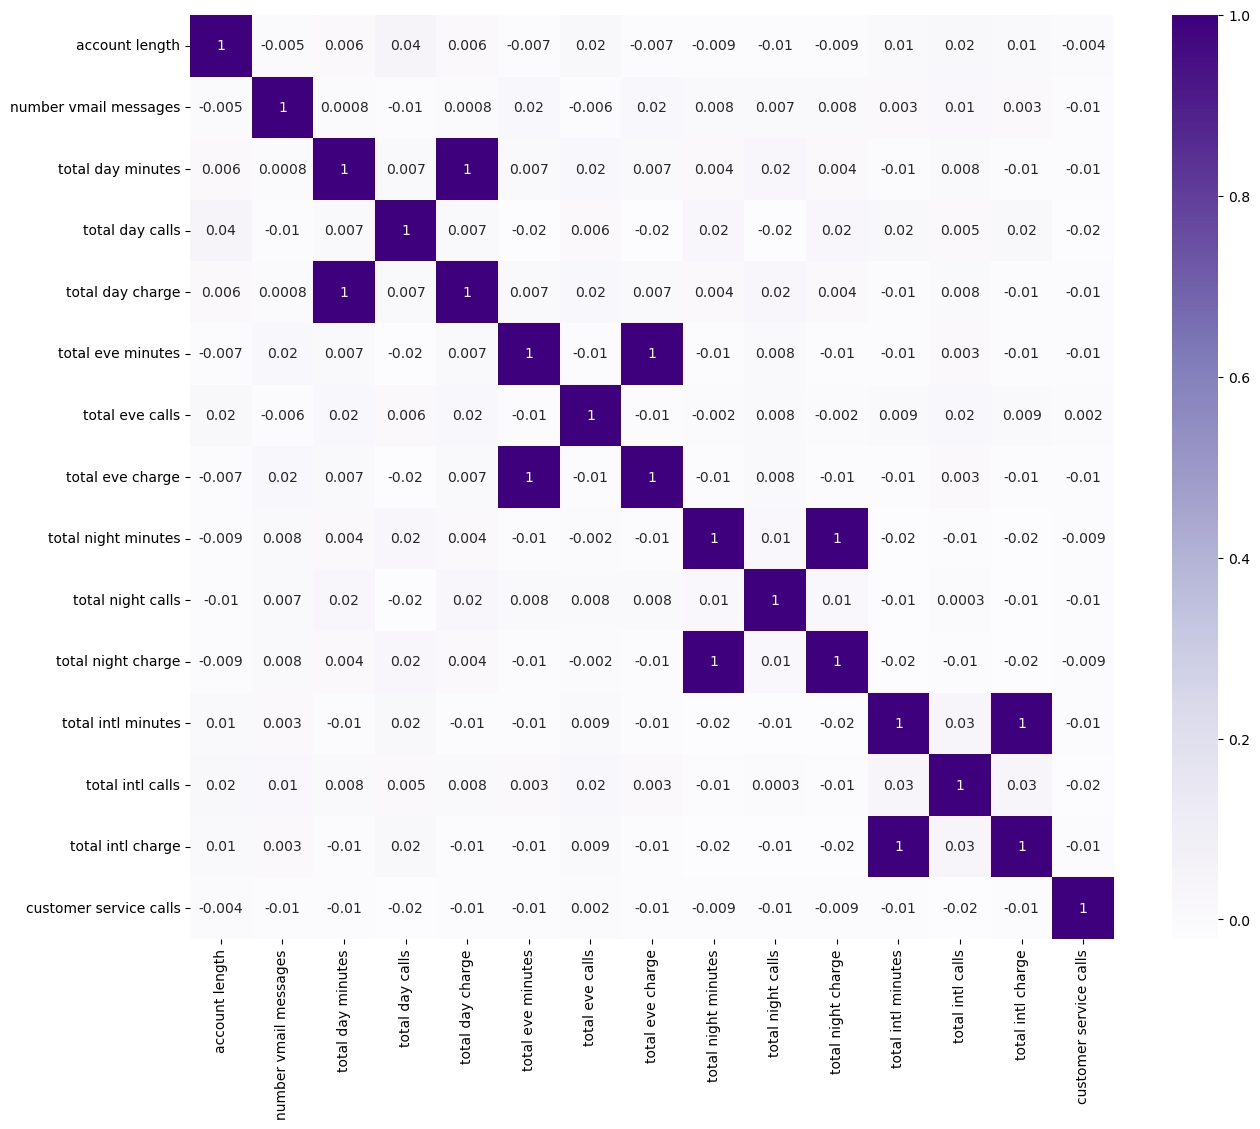

In [114]:
corr_matrix = df[numeric_cols].corr()
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Pick a colour in above and explain


### Outliers


In [115]:
data = df.select_dtypes(include=[np.number]).values

z_scores = stats.zscore(data)
outliers = np.where(np.abs(z_scores) > 3)

#print("Outliers:")
#for i, j in zip(*outliers):
    #print(f"Row: {i}, Column: {df.columns[j]}, Value: {data[i][j]}")
print("Shape before filtering:", df.shape)

df_filtered = df.drop(df.index[outliers[0]])
print("Shape after filtering:", df_filtered.shape)

Shape before filtering: (3333, 20)
Shape after filtering: (3169, 20)


### Correlation


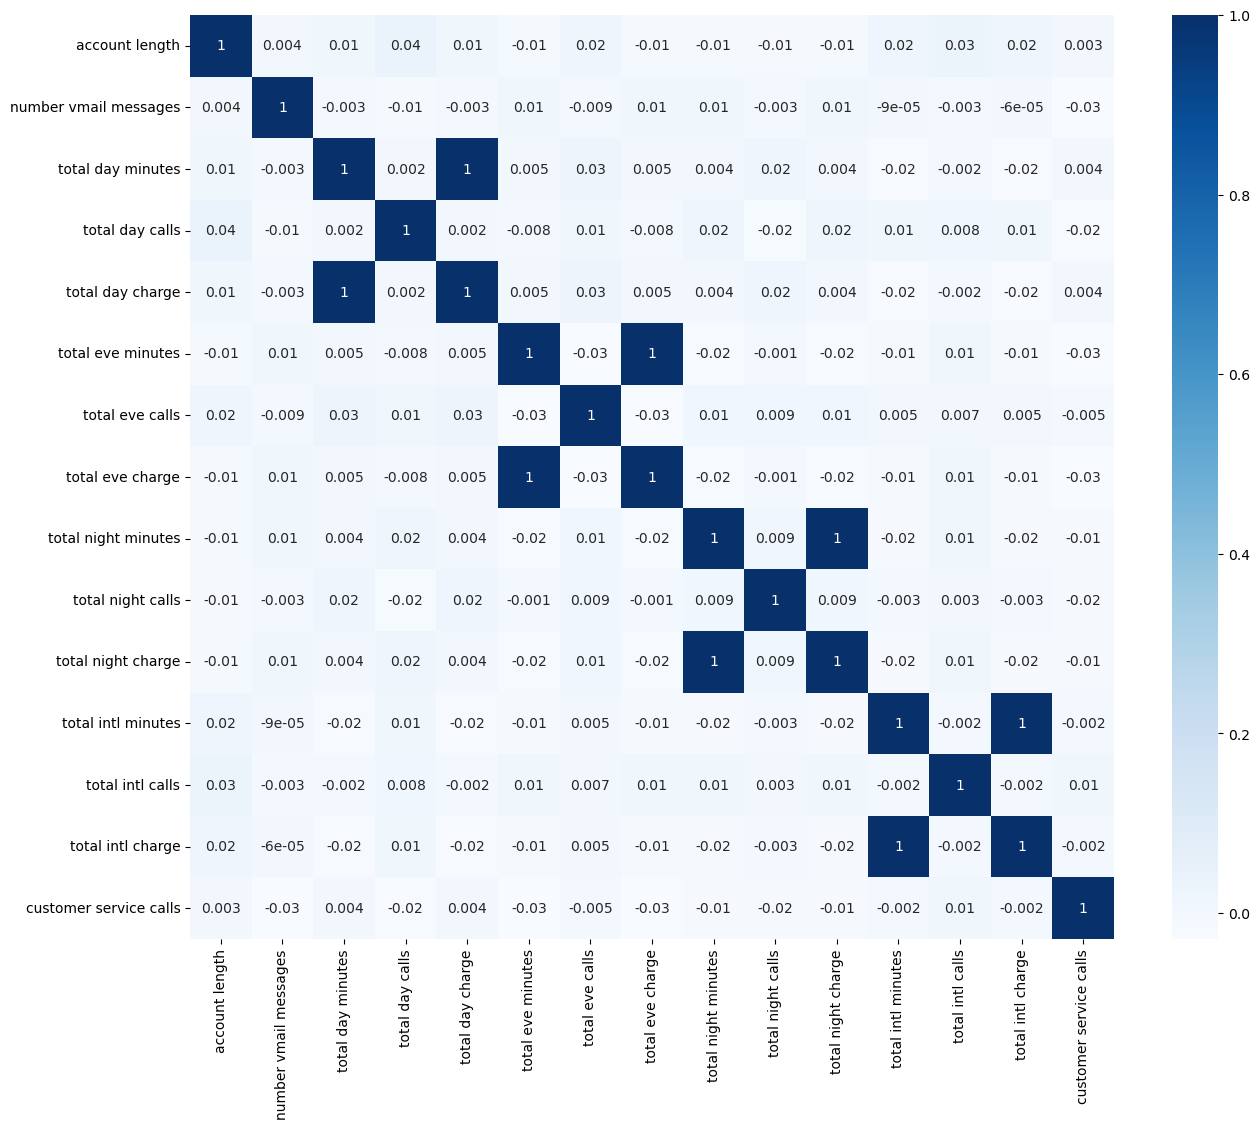

In [116]:
corr_matrix = df_filtered[numeric_cols].corr()
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

In [117]:
# Find columns with correlation above 0.9
high_corr_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.9:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Print shape of columns before reducing
print("Shape before reducing columns:", df_filtered.shape)

# Remove high correlation columns from the dataframe
df_reduced = df_filtered.drop(columns=high_corr_columns)

# Print shape of columns after reducing
print("Shape after reducing columns:", df_reduced.shape)

Shape before reducing columns: (3169, 20)
Shape after reducing columns: (3169, 16)


### Changing Churn to 1 and 0


In [118]:
df_reduced['churn'].value_counts()

False    2727
True      442
Name: churn, dtype: int64

In [119]:
df_reduced["churn"] = df_reduced["churn"].map({True: 1, False: 0}).astype('int')
df_reduced['churn'].value_counts()

0    2727
1     442
Name: churn, dtype: int64

In [120]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3169 non-null   object 
 1   account length          3169 non-null   int64  
 2   area code               3169 non-null   int64  
 3   international plan      3169 non-null   object 
 4   voice mail plan         3169 non-null   object 
 5   number vmail messages   3169 non-null   int64  
 6   total day minutes       3169 non-null   float64
 7   total day calls         3169 non-null   int64  
 8   total eve minutes       3169 non-null   float64
 9   total eve calls         3169 non-null   int64  
 10  total night minutes     3169 non-null   float64
 11  total night calls       3169 non-null   int64  
 12  total intl minutes      3169 non-null   float64
 13  total intl calls        3169 non-null   int64  
 14  customer service calls  3169 non-null   

### One-hot Encoding


In [121]:
df_reduced.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn'],
      dtype='object')

In [122]:
categoric_cols= ['state','area code','international plan','voice mail plan']

In [123]:
# ohe_df = pd.get_dummies(df_reduced, columns=categoric_cols)

# ohe_df = ohe_df.drop(categoric_cols, axis=1)

# ohe_df.info()

In [124]:
# # Perform one-hot encoding
# df_encoded = pd.get_dummies(df_reduced, columns=['state', 'area code', 'international plan', 'voice mail plan'])

# # Drop the original categorical columns
# df_encoded.drop(categoric_cols, axis=1, inplace=True)
# df_encoded.info()

In [125]:
df_reduced['international plan'].value_counts()

no     2860
yes     309
Name: international plan, dtype: int64

In [126]:
df_reduced['voice mail plan'].value_counts()

no     2303
yes     866
Name: voice mail plan, dtype: int64

In [127]:
# Perform one-hot encoding
ohe_state = pd.get_dummies(df_reduced['state'], dtype='int64')
ohe_area_code = pd.get_dummies(df_reduced['area code'], dtype='int64', prefix="area_code_is")
ohe_intl_plan = pd.get_dummies(df_reduced['international plan'], dtype='int64', prefix="international_plan_is", drop_first = True)
ohe_voiceml_plan = pd.get_dummies(df_reduced['voice mail plan'], dtype='int64', prefix="voice_ml_plan_is", drop_first = True)
#ohe_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df_reduced = pd.concat([df_reduced, ohe_state, ohe_area_code, ohe_intl_plan, ohe_voiceml_plan], axis=1)
df_reduced = df_reduced.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)
df_reduced.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,VT,WA,WI,WV,WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_ml_plan_is_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,1,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,1,0,1,0


### Scaling

In [135]:
# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_reduced)

# Display the scaled data with column names
scaled_data_df = pd.DataFrame(scaled_data, columns=df_reduced.columns)
scaled_data_df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,VT,WA,WI,WV,WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_ml_plan_is_yes
0,0.587963,0.510204,0.773921,0.576271,0.490079,0.487179,0.643519,0.422414,0.487805,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.530612,0.450281,0.686441,0.483796,0.521368,0.675595,0.525862,0.713415,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.706066,0.610169,0.238095,0.581197,0.372024,0.534483,0.621951,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.384259,0.000000,0.881176,0.245763,0.041997,0.393162,0.485450,0.405172,0.280488,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.342593,0.000000,0.466229,0.601695,0.327712,0.683761,0.452381,0.681034,0.493902,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Train Test Split

In [138]:
X=scaled_data_df.drop(['churn'],axis=1)
y=scaled_data_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [141]:
scaled_data_df.shape

(3169, 68)

In [140]:
X_train.shape

(2376, 67)

#### SMOTE

In [143]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [144]:
X_train_resampled.shape

(4126, 67)

In [145]:
y_train_resampled.shape

(4126,)

### Model 1: Logistic regression

In [148]:
logreg= LogisticRegression()
logreg.fit(X_train_resampled,y_train_resampled) 

LogisticRegression()

In [162]:
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("**************** LOGISTIC REGRESSION MODEL RESULTS **************** ")
print(f"""
Accuracy Baseline: {logreg_accuracy:1.3f}
Recall Baseline: {logreg_recall:1.3f}
Precision Baseline: {logreg_precision:1.3f}
F1 Score Baseline: {logreg_f1:1.3f}
""")
      


**************** LOGISTIC REGRESSION MODEL RESULTS **************** 

Accuracy Baseline: 0.760
Recall Baseline: 0.729
Precision Baseline: 0.378
F1 Score Baseline: 0.497



In [158]:
# Create the confusion matrix display
# cm = ConfusionMatrixDisplay.from_estimator(logreg, y_test.reshape(-1, 1), y_pred.reshape(-1, 1))

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()


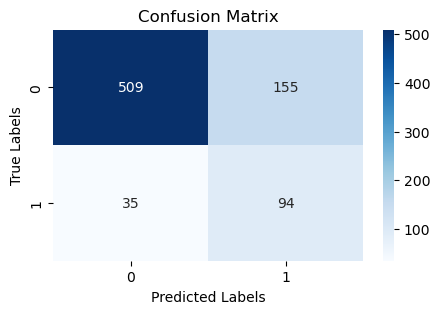

In [161]:
cm_lr = confusion_matrix(y_test, y_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

### Model 2- Random Forest

In [164]:
rf = RandomForestClassifier() 
rf.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf.predict(X_test)

In [165]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("**************** LOGISTIC REGRESSION MODEL RESULTS **************** ")
print(f"""
Accuracy Baseline: {rf_accuracy:1.3f}
Recall Baseline: {rf_recall:1.3f}
Precision Baseline: {rf_precision:1.3f}
F1 Score Baseline: {rf_f1:1.3f}
""")

**************** LOGISTIC REGRESSION MODEL RESULTS **************** 

Accuracy Baseline: 0.916
Recall Baseline: 0.690
Precision Baseline: 0.767
F1 Score Baseline: 0.727



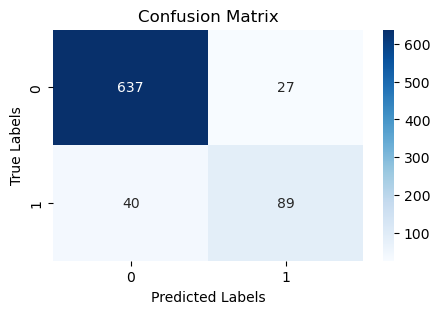

In [166]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

#### Cross validation

- look into doing it